# DAC wave samples with maximun amplitude #

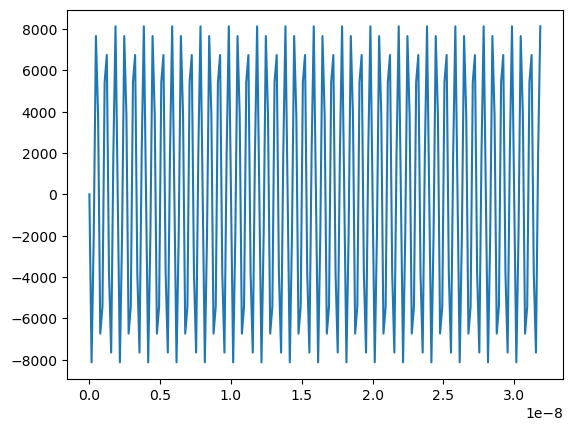

208


In [3]:
import numpy as np
import matplotlib.pyplot as plot
from math import pi
import csv

# File path for the CSV file
file_path = "data.csv"

# Functions definition

def decimal_to_twos_complement(decimal_num, num_bits):
    if decimal_num >= 0:
        # Positive numbers
        binary_representation = format(decimal_num, f'0{num_bits}b')
    else:
        # For negative numbers
        binary_representation = format((1 << num_bits) + decimal_num, f'0{num_bits}b')
    return binary_representation

def binary_to_decimal(binary_str):
    decimal_num = int(binary_str, 2)
    return decimal_num


fw = 5 * 10**9       # wave frequency
fs = 6.5 * 10**9          # Sampling frequency or AXIs frequency of DAC
Tw = 1/fw                   
Ts = 1/fs

A = 8191                    # amplitude

t = np.arange(0, 160*Tw, Ts)   # time samples

# Sine wave samples
amplitude = np.round(A*np.sin(2*np.pi*fw*t)).astype(int)

# Plot sine wave
plot.plot(t, amplitude)
plot.show()

# Convert to twos complement
twos_complement = np.vectorize(decimal_to_twos_complement)(amplitude,14)
#print(twos_complement)
print(len(twos_complement))

# Convert twos complement to unsigned decimal format
decimal = np.vectorize(binary_to_decimal)(twos_complement)

# Export the array to CSV file
with open(file_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_ALL)
    csvwriter.writerow(twos_complement)

# Sine LUT samples generation #

In [4]:
sin_file_path = "sindata.csv"
cos_file_path = "cosdata.csv"

FRACTION_BITS = 10
LUT_DEPTH = 256

def float_to_fixed_point(value):
    # Convert a floating-point value to fixed-point with FRACTION_BITS fractional bits
    return int(value * (2 ** FRACTION_BITS))

angles = np.linspace(0, 360, LUT_DEPTH)   # angles samples in grad

# Sine and cosine samples
sin = np.around(np.sin((2*np.pi/360)*angles),decimals=3)
cos = np.around(np.cos((2*np.pi/360)*angles),decimals=3)

# Sine and cosine samples in fixed-point
sin_fixed = np.vectorize(float_to_fixed_point)(sin)
cos_fixed = np.vectorize(float_to_fixed_point)(cos)

# Sine and cosine samples in two's compliment
sin_twos_complement = np.vectorize(decimal_to_twos_complement)(sin_fixed,12)
cos_twos_complement = np.vectorize(decimal_to_twos_complement)(cos_fixed,12)

print(len(sin_twos_complement))
print(len(cos_twos_complement))


# Export the array to CSV file
with open(sin_file_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_ALL)
    csvwriter.writerow(sin_twos_complement)
    csvwriter.writerow(cos_twos_complement)


256
256
